# Logistic Regression and Random Forest Classifier

In [1]:
import re
import json
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/simrankodwani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simrankodwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reading the json file and storing it in a dataframe

In [2]:
path = '/Users/simrankodwani/Downloads/News_Category_Dataset_v2.json'
list_ = []

with open(path) as files:
    for file in files:
        list_.append(json.loads(file))

In [3]:
df = pd.DataFrame(list_)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


Checking the unique values in the category column

In [5]:
# df['category'].unique()

In [4]:
len(df['category'].unique())

41

**Bar plot**

Number of articles per catergory[41]

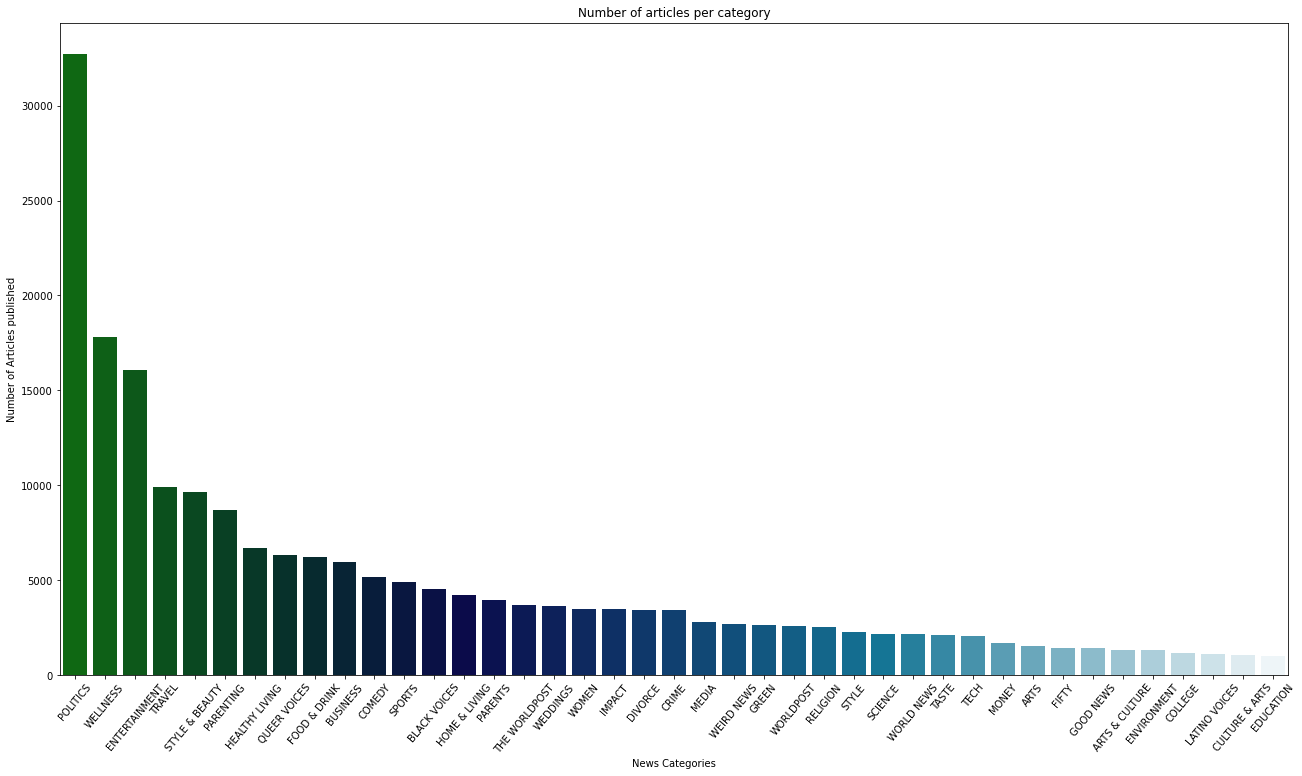

In [5]:
f = df.groupby(['category'])['headline'].count().sort_values(ascending=False)
f = f.reset_index()
fig, ax = plt.subplots(figsize =(22,12))
c = sns.barplot(data=f, y='headline', x='category', palette='ocean')
c.set(xlabel='News Categories', ylabel='Number of Articles published', title='Number of articles per category')
plt.xticks(rotation=50);

Combining raw data categories that are very close and can be considered the same...

In [6]:
df['category'] = df['category'].replace(['COLLEGE', 'PARENTS', 'ARTS & CULTURE','CULTURE & ARTS', 
                                        'THE WORLDPOST', 'WORLDPOST', 'WEDDINGS','DIVORCE',
                                        'GREEN','STYLE','TASTE','HEALTHY LIVING','FIFTY'],
                                        ['EDUCATION', 'PARENTING', 'ARTS','ARTS','WORLD NEWS', 
                                         'WORLD NEWS','MARRIAGE','MARRIAGE','ENVIRONMENT',
                                         'STYLE & BEAUTY','FOOD & DRINK','HOME & LIVING','LIFESTYLE'])

In [7]:
len(df['category'].unique())

30

**Bar plot**

Number of articles per catergory[30]

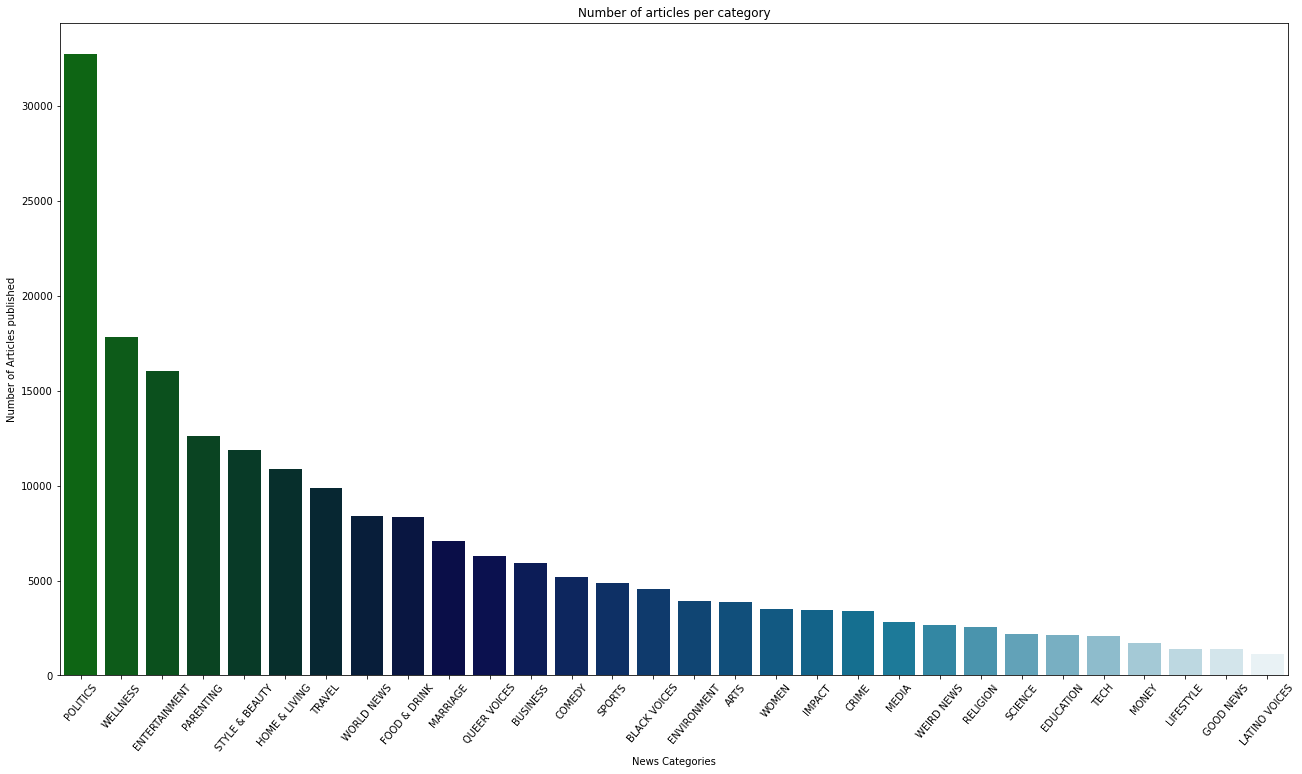

In [8]:
f = df.groupby(['category'])['headline'].count().sort_values(ascending=False)
f = f.reset_index()
fig, ax = plt.subplots(figsize =(22,12))
c = sns.barplot(data=f, y='headline', x='category', palette='ocean')
c.set(xlabel='News Categories', ylabel='Number of Articles published', title='Number of articles per category')
plt.xticks(rotation=50);

Merging Headline and Short Description in the dataset for text classification

In [9]:
df['headline+description'] = df['headline'] + ' ' + df['short_description']

Converting to lower case


In [10]:
df['headline+description'] = df['headline+description'].str.lower()

Removing special characters

In [11]:
special_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in special_chars:
    df['headline+description'] = df['headline+description'].str.replace(char, ' ')

<ipython-input-11-de3498bead0b>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['headline+description'] = df['headline+description'].str.replace(char, ' ')


Removing stop words

In [12]:
stop = stopwords.words('english')
df['headline+description'] = df['headline+description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Tokenizing

In [13]:
df['tokenized_text'] = df['headline+description'].apply(word_tokenize) 

Stemming

In [14]:
stemmer = SnowballStemmer("english")
df['stemmed'] = df['tokenized_text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
# df['totalwords'] = df['headline+description'].str.split().str.len()

In [ ]:
# d=df.loc[df['totalwords']<10]
# d

In [ ]:
# count = df['headline+description'].str.split().str.len()
# count.index = count.index.astype(str) + ' words:'
# count.sort_index(inplace=True)
# count

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn import metrics
import itertools

In [16]:
df['Summary'] = [" ".join(review) for review in df['stemmed'].values]
# df

In [17]:
X = df['Summary']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
names = np.unique(df['category'])

In [19]:
df

,category,headline,authors,link,short_description,date,headline+description,tokenized_text,stemmed,Summary
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26,2 mass shootings texas last week 1 tv left husband killed children another day america,"[2, mass, shootings, texas, last, week, 1, tv, left, husband, killed, children, another, day, america]","[2, mass, shoot, texa, last, week, 1, tv, left, husband, kill, children, anoth, day, america]",2 mass shoot texa last week 1 tv left husband kill children anoth day america
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26,smith joins diplo nicky jam 2018 world cup official song course song,"[smith, joins, diplo, nicky, jam, 2018, world, cup, official, song, course, song]","[smith, join, diplo, nicki, jam, 2018, world, cup, offici, song, cours, song]",smith join diplo nicki jam 2018 world cup offici song cours song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26,hugh grant marries first time age 57 actor longtime girlfriend anna eberstein tied knot civil ceremony,"[hugh, grant, marries, first, time, age, 57, actor, longtime, girlfriend, anna, eberstein, tied, knot, civil, ceremony]","[hugh, grant, marri, first, time, age, 57, actor, longtim, girlfriend, anna, eberstein, tie, knot, civil, ceremoni]",hugh grant marri first time age 57 actor longtim girlfriend anna eberstein tie knot civil ceremoni
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26,jim carrey blasts castrato adam schiff democrats new artwork actor gives dems ass kicking fighting hard enough donald trump,"[jim, carrey, blasts, castrato, adam, schiff, democrats, new, artwork, actor, gives, dems, ass, kicking, fighting, hard, enough, donald, trump]","[jim, carrey, blast, castrato, adam, schiff, democrat, new, artwork, actor, give, dem, ass, kick, fight, hard, enough, donald, trump]",jim carrey blast castrato adam schiff democrat new artwork actor give dem ass kick fight hard enough donald trump
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26,julianna margulies uses donald trump poop bags pick dog dietland actress said using bags really cathartic therapeutic moment,"[julianna, margulies, uses, donald, trump, poop, bags, pick, dog, dietland, actress, said, using, bags, really, cathartic, therapeutic, moment]","[julianna, marguli, use, donald, trump, poop, bag, pick, dog, dietland, actress, said, use, bag, realli, cathart, therapeut, moment]",julianna marguli use donald trump poop bag pick dog dietland actress said use bag realli cathart therapeut moment
...,...,...,...,...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans For BlackBerry,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-thorsten-heins_us_5bb34b8ce4b0fa920b95c4e1,Verizon Wireless and AT&T are already promoting LTE devices including smartphones and tablets from RIM's rivals

In [18]:
text_np = Pipeline([('Vectorizer', CountVectorizer()),
                    ('tf_idf', TfidfTransformer()),
                    ('logreg', LogisticRegression(solver='newton-cg', multi_class='multinomial'))])
text_np = text_np.fit(X_train, y_train)
predicted2 = text_np.predict(X_test)

metrics.accuracy_score(y_test, predicted2)

0.6480794603071868

In [25]:
text_np.predict(['smith join diplo nicki jam 2018 world cup offici song cours song'])

array(['ENTERTAINMENT'], dtype=object)

In [36]:
print(metrics.classification_report(y_test, predicted2, target_names=sorted(names)))

                precision    recall  f1-score   support

          ARTS       0.62      0.45      0.52       803
  BLACK VOICES       0.56      0.37      0.44       882
      BUSINESS       0.52      0.47      0.50      1121
        COMEDY       0.65      0.42      0.51      1068
         CRIME       0.61      0.55      0.58       650
     EDUCATION       0.52      0.38      0.44       431
 ENTERTAINMENT       0.57      0.75      0.65      3139
   ENVIRONMENT       0.58      0.46      0.51       790
  FOOD & DRINK       0.75      0.79      0.77      1723
     GOOD NEWS       0.49      0.12      0.19       276
 HOME & LIVING       0.52      0.43      0.47      2190
        IMPACT       0.46      0.24      0.31       696
 LATINO VOICES       0.68      0.21      0.33       215
     LIFESTYLE       0.51      0.14      0.22       269
      MARRIAGE       0.83      0.76      0.79      1466
         MEDIA       0.57      0.31      0.41       544
         MONEY       0.60      0.33      0.43  

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
text_np = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf2', RandomForestClassifier()),])

text_np = text_np.fit(X_train, y_train)
ypred = text_np.predict(X_test)

metrics.accuracy_score(y_test, ypred)

0.5890069950959648

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, ypred))

Accuracy: 0.5890069950959648


In [42]:
print(metrics.classification_report(y_test, ypred, target_names=sorted(names)))

                precision    recall  f1-score   support

          ARTS       0.58      0.32      0.42       803
  BLACK VOICES       0.54      0.23      0.32       882
      BUSINESS       0.45      0.36      0.40      1121
        COMEDY       0.60      0.31      0.41      1068
         CRIME       0.50      0.46      0.48       650
     EDUCATION       0.48      0.35      0.40       431
 ENTERTAINMENT       0.50      0.68      0.58      3139
   ENVIRONMENT       0.57      0.26      0.36       790
  FOOD & DRINK       0.63      0.77      0.70      1723
     GOOD NEWS       0.50      0.05      0.09       276
 HOME & LIVING       0.47      0.41      0.44      2190
        IMPACT       0.64      0.08      0.15       696
 LATINO VOICES       0.77      0.11      0.19       215
     LIFESTYLE       0.29      0.01      0.03       269
      MARRIAGE       0.81      0.77      0.79      1466
         MEDIA       0.54      0.19      0.28       544
         MONEY       0.83      0.11      0.20  